In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.DataFrame(pd.read_csv("dataNFLX.CSV.csv"))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Text(0.5, 1.0, ' Netflix Stock Plot for Overall Period')

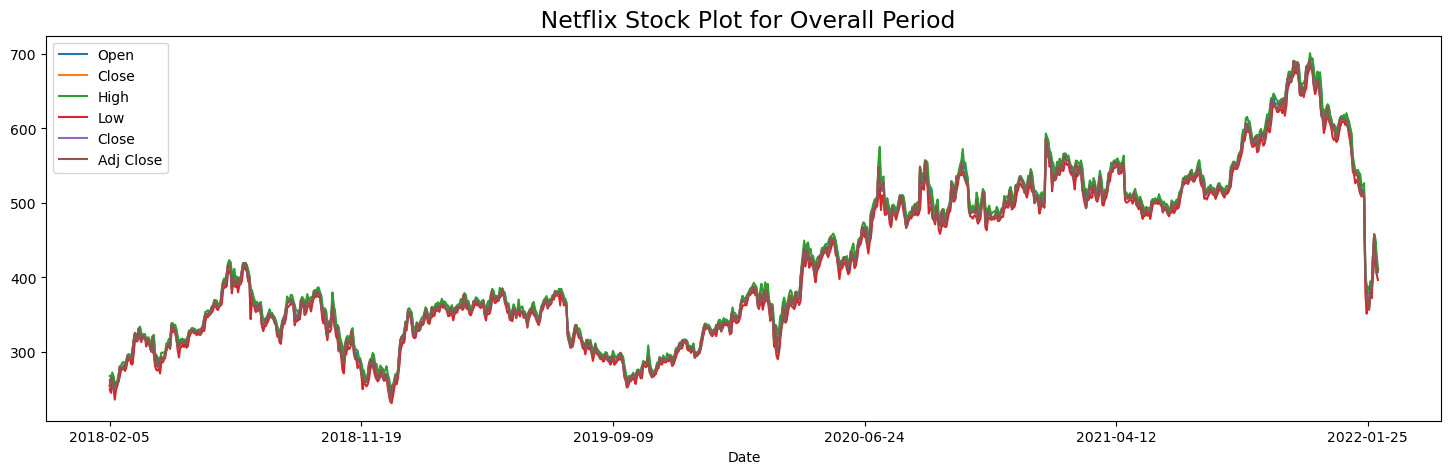

In [4]:
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Netflix Stock Plot for Overall Period", fontsize=17)

In [5]:
a = df.sort_values(by='High',ascending= False).head(5)
a['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

In [6]:
b = df.sort_values(by='Low',ascending= True).head(5)
b['Low']

Date
2018-12-26    231.229996
2018-12-24    233.679993
2018-02-09    236.110001
2018-12-27    240.100006
2018-12-21    241.289993
Name: Low, dtype: float64

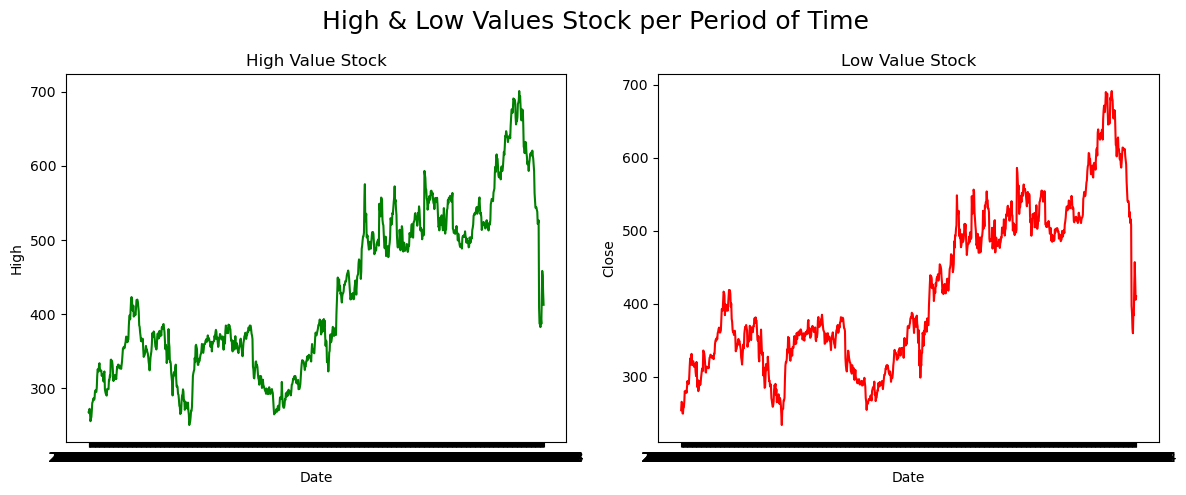

In [7]:
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(12,5))
fig.suptitle('High & Low Values Stock per Period of Time',fontsize=18)
sns.lineplot(ax= axes[0], y=df['High'],x=df.index, color='green')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=df['Close'], x=df.index, color='red')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

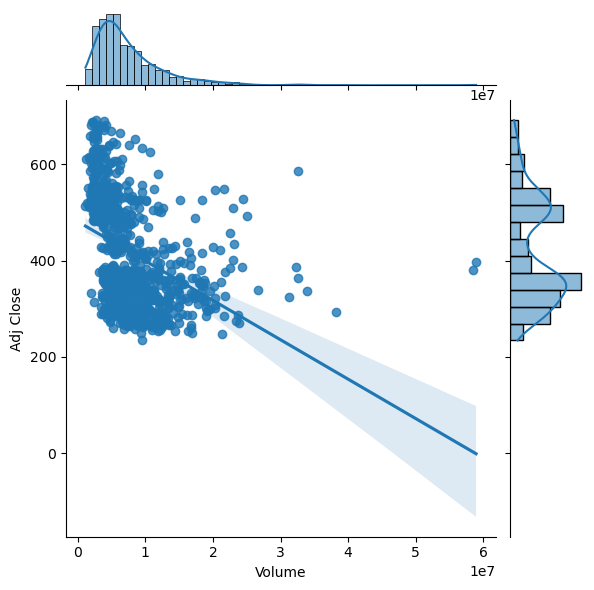

In [8]:
sns.jointplot(x='Volume', y='Adj Close', data=df, kind='reg')

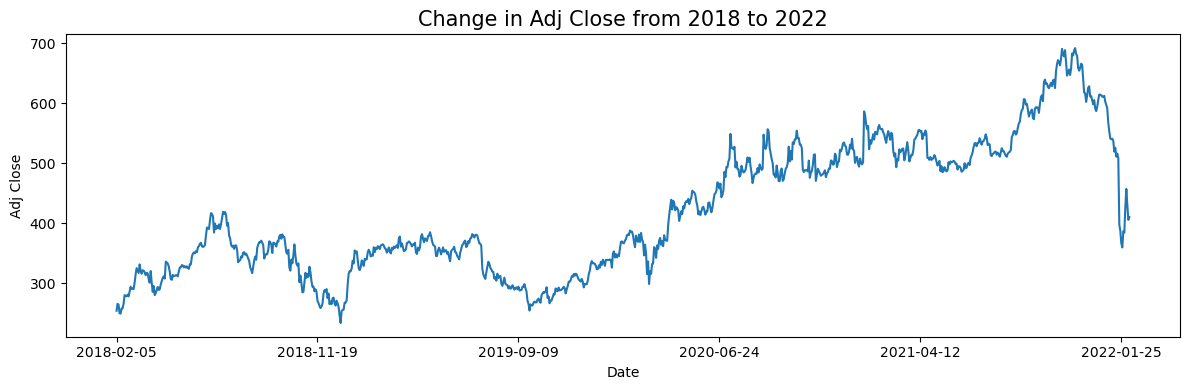

In [9]:
plt.figure(figsize=(12,4))
df['Adj Close'].plot()
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Adj Close',fontsize= 10)
plt.title('Change in Adj Close from 2018 to 2022',fontsize= 15)
plt.tight_layout()

In [10]:
df['Daily_returns'] = df['Adj Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.004366
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.054657
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.002519


In [11]:
df[df['Daily_returns']==df['Daily_returns'].max()]['Daily_returns']

Date
2021-01-20    0.168543
Name: Daily_returns, dtype: float64

In [12]:
df[df['Daily_returns']==df['Daily_returns'].min()]['Daily_returns']

Date
2022-01-21   -0.217905
Name: Daily_returns, dtype: float64

Text(0.5, 1.0, 'Netflix Stock Daily Returns')

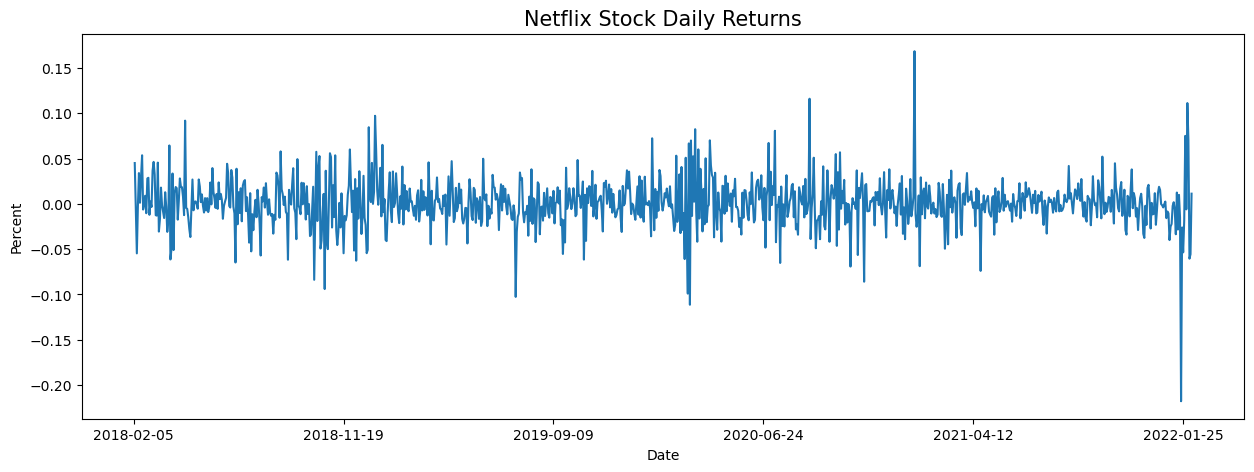

In [13]:
plt.figure(figsize=(15,5))
df['Daily_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix Stock Daily Returns",fontsize= 15 )

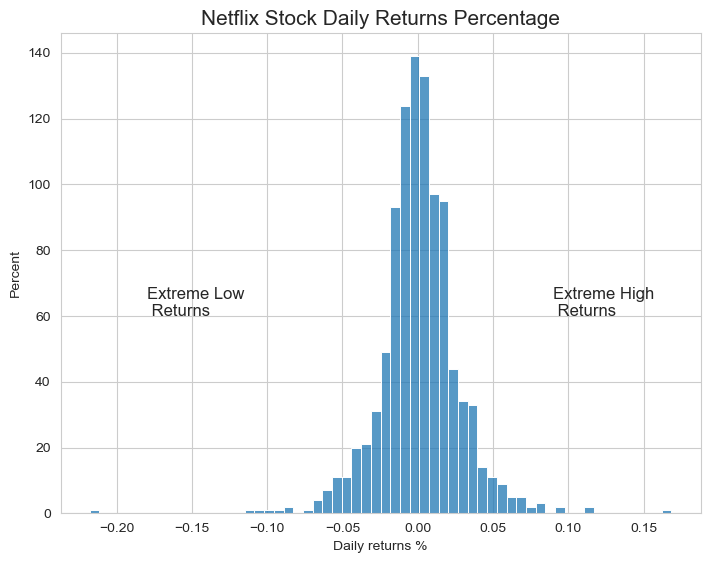

In [14]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= df['Daily_returns'], bins=60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.18,60,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.09,60,"Extreme High\n Returns", fontsize= 12)
plt.show()

In [15]:
df['Cum_returns']= (df['Daily_returns']+1).cumprod()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.045072,1.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.004366,1.040510
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.054657,0.983639
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.002519,0.981161


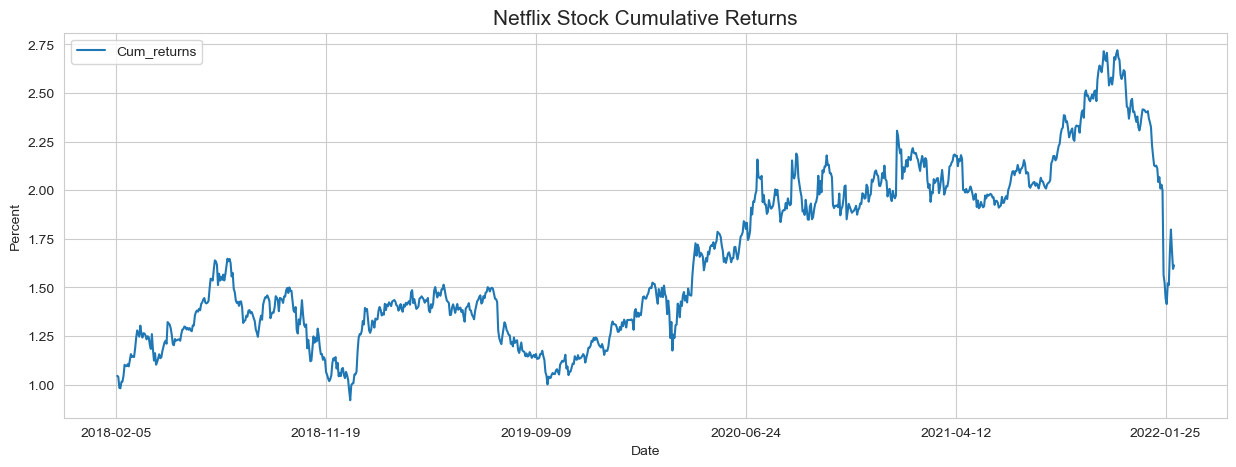

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df['Cum_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix Stock Cumulative Returns",fontsize= 15 )
plt.legend()

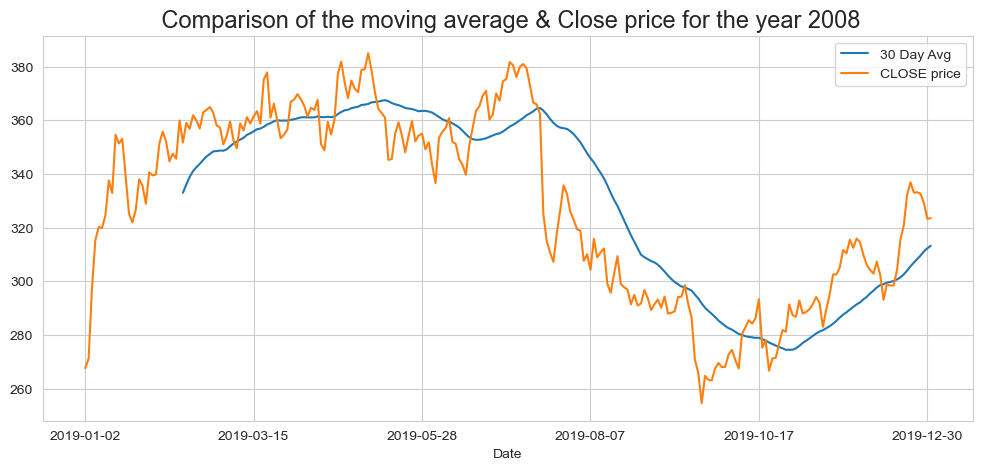

In [17]:
sns.set_style('whitegrid')
f= plt.figure(figsize=(12,5))
df['Close'].loc['2019-01-01': '2019-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].loc['2019-01-01':'2019-12-31'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for the year 2008", fontsize=17)
plt.legend()

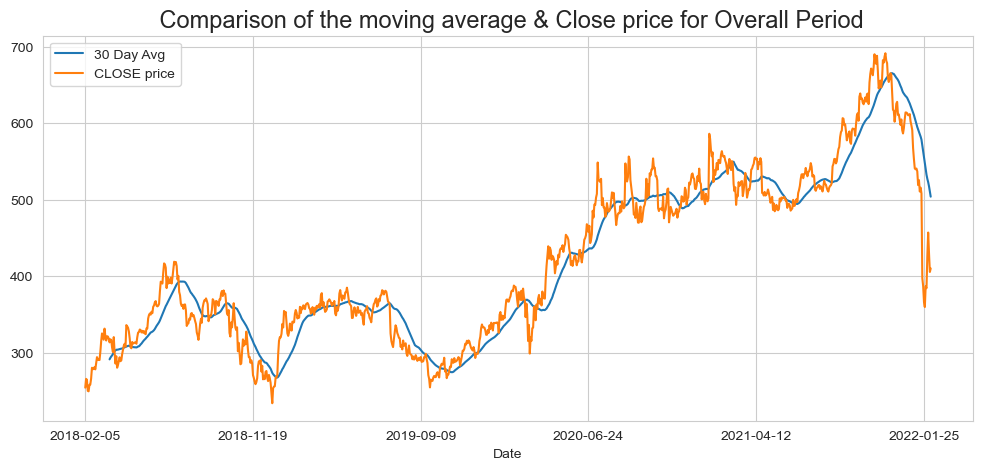

In [18]:
f= plt.figure(figsize=(12,5))
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for Overall Period", fontsize=17)
plt.legend()

In [19]:
df['Mean Avg 30Day'] = df['Close'].rolling(window=30).mean() # MA= mean Average
df['STD 30Day'] = df['Close'].rolling(window=30).std()

In [20]:
df['Upper Band']= df['Mean Avg 30Day'] + (df['STD 30Day'] *2)
df['Lower Band']= df['Mean Avg 30Day'] - (df['STD 30Day'] *2)
df.head()


,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns,Mean Avg 30Day,STD 30Day,Upper Band,Lower Band
Date,,,,,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.045072,1.045072,NaN,NaN,NaN,NaN
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.004366,1.040510,NaN,NaN,NaN,NaN
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.054657,0.983639,NaN,NaN,NaN,NaN
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.002519,0.981161,NaN,NaN,NaN,NaN


Text(0.5, 1.0, ' Bollinger Band Plot for Overall Period')

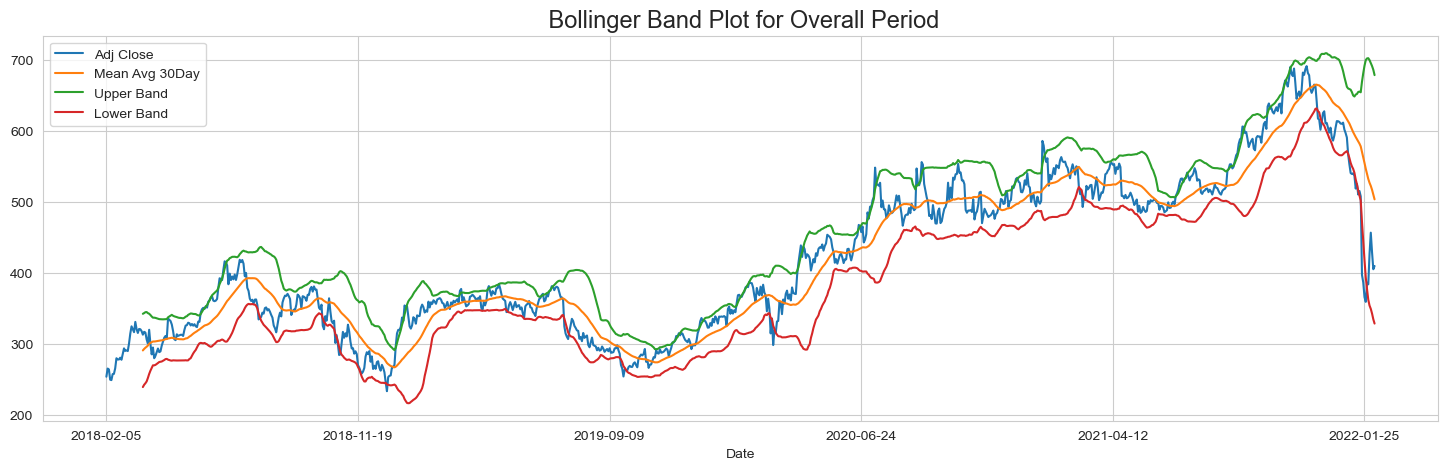

In [21]:
df[['Adj Close', 'Mean Avg 30Day', 'Upper Band', 'Lower Band']].plot(figsize=(18,5))
plt.title(" Bollinger Band Plot for Overall Period", fontsize=17)

# Train & test Data


In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [23]:
X= df[['Open', 'High', 'Low', 'Close', 'Volume']]
y= df['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Applying Model

In [25]:
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[553.97137601 379.24978571 361.31195786 282.40620018 261.1106334
 434.12840093 265.0824694  517.95360648 315.69806911 348.77217258
 520.26088534 321.34475264 489.8786001  298.20136405 510.71931092
 503.11331151 288.72631361 549.49048582 337.49758105 270.21613725
 338.57249553 294.20496034 462.41338583 369.04247224 290.21113387
 502.95015314 498.44456133 297.0068608  351.28284837 363.6167203
 280.9209422  542.83422599 316.88713674 540.81543363 303.79664093
 520.05826545 339.61662634 381.28551173 515.83044348 628.45031635
 482.24322233 297.94551988 305.69776403 264.88771103 515.96472066
 297.15404023 294.31643878 384.10761578 359.67359121 418.47030435
 365.85938115 608.07853329 480.62820511 512.64729849 364.59257334
 419.06538422 375.27641322 360.28349379 370.55831938 361.0713409
 294.90635352 493.30368374 491.94251831 405.99833518 325.16781697
 508.27718568 504.37618136 354.91632678 321.10632151 344.47837739
 656.26341881 351.3631924  263.21120194 267.71782703 427.07612088
 548.08470416

# Performance Evaluation



In [26]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.6654
Mean Squared Error: 2.2328
Root Mean Squared Error: 1.4943
(R^2) Score: 0.9998
Train Score : 100.00% and Test Score : 99.98% using Random Tree Regressor.
Accuracy: 99.85 %.


# Predictions

In [32]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

#collecting future days from predicted values

threedays_df = pd.DataFrame(predictions[:3])
threedays_df.to_csv("three-days-predictions.csv")

In [33]:
print(predictions)

            Predictions
2022-02-04   553.971376
2022-02-05   379.249786
2022-02-06   361.311958
2022-02-07   282.406200
2022-02-08   261.110633
...                 ...
2022-11-29   546.881825
2022-11-30   410.687537
2022-12-01   278.800790
2022-12-02   406.711621
2022-12-03   328.576020

[303 rows x 1 columns]


# 3 days prediction

Buy price and date
   Unnamed: 0  Predictions
2  2022-02-06   361.311958 

Sell price and date
   Unnamed: 0  Predictions
0  2022-02-04   553.971376


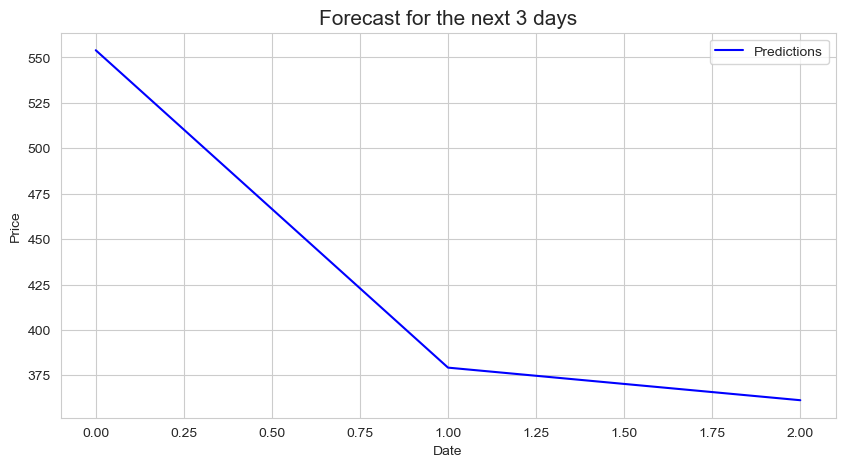

In [34]:
threedays_df_pred = pd.read_csv("three-days-predictions.csv")
buy_price = min(threedays_df_pred["Predictions"])
sell_price = max(threedays_df_pred["Predictions"])
threedays_buy = threedays_df_pred.loc[threedays_df_pred["Predictions"] == buy_price]
threedays_sell = threedays_df_pred.loc[threedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(threedays_buy,'\n')
print("Sell price and date")
print(threedays_sell)
threedays_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 3 days",size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()